👉 **Note that this notebook has mistakes that you need to fix as a part of the challenge.**

# Connect to SAP HANA

...the usual way like you've done so far 

In [1]:
import os

In [2]:
# Set env variable for SAP HANA user store on a virtual host with a changing host name
os.environ["HDB_USE_IDENT"]=os.getenv("WORKSPACE_ID")
print(os.getenv("HDB_USE_IDENT"))

workspaces-ws-vklhr


In [3]:
from hana_ml import dataframe as hdf

In [4]:
myconn=hdf.ConnectionContext(userkey='myDevChallenger')
print("SAP HANA DB version: ", myconn.hana_version())

SAP HANA DB version:  4.00.000.00.1718710788 (fa/CE2024.14)


# Query HANA table with `REAL_VECTOR` to find two similar pets

In [5]:
source_table='IMAGES'

## Closest neighbours (for image embeddings)

Use the Vector Engine's [cosine similarity calculation for two vectors](https://help.sap.com/docs/hana-cloud-database/sap-hana-cloud-sap-hana-database-vector-engine-guide/cosine-similarity-063e1366a7d54735b98b2513ea4a88c9) to find a pet similar to a randomly chosen one. 

Try it a few times to get some different results, but as well check the similarity score returned for these two images.

In [18]:
import random
random_record = random.randint(1, myconn.table(table=source_table).count())
print(f"Random record number: {random_record}")

Random record number: 7


In [19]:

sql = f'''
SELECT 
  "B"."NAME" AS "BREED", 
  "A"."NAME" AS "SIMILAR_ONE", 
  "COSINE_SIMILARITY"("A"."IV", "B"."IV") AS "SIMILARITY_SCORE",
  "B"."IMAGE_NAME", 
  "A"."IMAGE_NAME" AS "SIMILAR_IMAGE_NAME",
  "B"."IMAGE", 
  "A"."IMAGE" AS "SIMILAR_IMAGE"
FROM 
  {source_table} AS "A"
INNER JOIN 
  (SELECT 
     ROW_NUMBER() OVER () AS "row_num", *
   FROM {source_table}
  ) AS "B" 
ON "A"."NAME" <> "B"."NAME"
WHERE "B"."row_num" = {random_record}
ORDER BY "SIMILARITY_SCORE" DESC;
'''

hdf = myconn.sql(sql)
#print(hdf.select_statement)
df=hdf.head(3).collect()

display(df.iloc[:,:3].style.hide(axis='index'))


BREED,SIMILAR_ONE,SIMILARITY_SCORE
GermanShorthairedPointer,Beagle,0.701612
GermanShorthairedPointer,LabradorRetriever,0.669561
GermanShorthairedPointer,Dachshund,0.660329


Retrieve Base64-encoded images of thoese two similar pets and display them side-by-side. 

In [20]:
from IPython.display import display, HTML


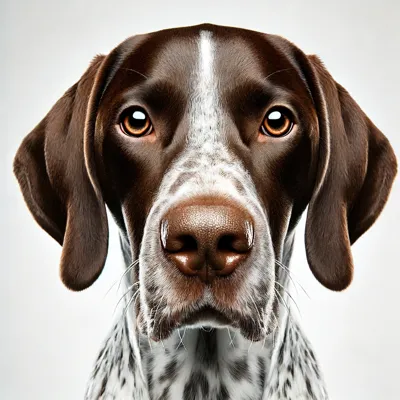
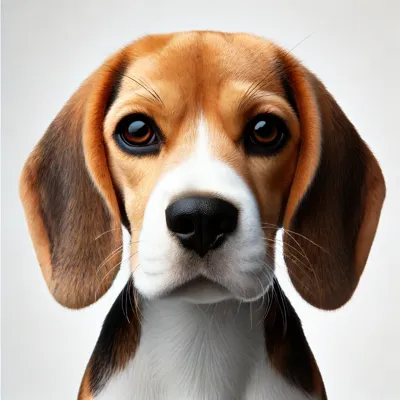

In [21]:
# Create HTML for side-by-side display
html_code = f"""
<div style="display: flex; justify-content: space-around;">
    <div style="text-align: center;">
        <img src="data:image/webp;base64,{df.IMAGE.iloc[0]}" width="400"><br>{df.BREED.iloc[0]}
    </div>
    <div style="text-align: center;">
        <img src="data:image/webp;base64,{df.SIMILAR_IMAGE.iloc[0]}" width="400"><br>{df.SIMILAR_ONE.iloc[0]}
    </div>
</div>
"""

# Display the HTML
display(HTML(html_code))


Find the pair of pets you like the most and paste the screenshot in the submission thread for the Week 3: https://community.sap.com/t5/application-development-discussions/submissions-for-quot-sap-hana-cloud-multi-model-quot-developer-challenge/m-p/13736471#M2028617 

## Not challenged enough?

Here are the two additional ideas for you:

1. Find which pet is the least similar to any other pet (where its top similarity score is the lowest).
2. Got a pet? Or got a picture of some other cat or dog? Find what the most similar pet in the table "IMAGES" is.